In [1]:
pip install patsy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy
# packages for importing files
import os
import glob

## Creating Summary Dataframe ##

In [3]:
# import intermediate csv
path = 'intermediate_csv/'
df_fat = pd.read_csv(path + 'fat.csv')
df_protein = pd.read_csv(path + 'protein.csv')
df_quantity = pd.read_csv(path + 'quantity.csv')

col_names = df_fat.columns

In [4]:
df_fat.head(3)

,Unnamed: 0,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,...,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products,confirmed,deaths,recovered,active,population
0,0,Afghanistan,0.0,1.39065,4.83625,0.0,1.79580,0.15330,0.0073,0.09490,...,0.0,0.16790,3.81790,0.08030,6.34005,0.132362,0.005628,0.107190,0.000000,38928000.0
1,1,Albania,0.0,2.93460,27.48085,0.0,2.29585,1.41255,0.1241,0.55115,...,0.0,0.78840,7.93875,0.55845,15.45775,2.054827,0.041614,1.185130,0.828083,2838000.0
2,2,Algeria,0.0,0.52195,8.38770,0.0,2.44550,0.70810,0.1168,0.33580,...,0.0,0.50005,15.91765,0.29930,20.70280,0.225211,0.006227,0.151938,0.067047,44357000.0


In [5]:
df_protein.head(3)

,Unnamed: 0,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,...,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products,confirmed,deaths,recovered,active,population
0,0,Afghanistan,0.0000,0.01095,3.85075,0.0,14.20580,0.1606,0.02555,0.22995,...,0.00000,0.05475,0.00000,0.44895,15.89210,0.132362,0.005628,0.107190,0.000000,38928000.0
1,1,Albania,0.1606,0.06205,24.21410,0.0,12.42095,1.5768,0.54750,1.11325,...,0.00365,0.23360,0.00730,2.83240,19.42165,2.054827,0.041614,1.185130,0.828083,2838000.0
2,2,Algeria,0.0219,0.00365,9.38415,0.0,18.01640,0.8760,0.43070,0.78840,...,0.00000,0.18615,0.01825,2.12065,24.53165,0.225211,0.006227,0.151938,0.067047,44357000.0


In [6]:
df_quantity.head(3)

,Unnamed: 0,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,...,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products,confirmed,deaths,recovered,active,population
0,0,Afghanistan,0.01,1.41,67.42,0.0,177.30,1.50,0.25,38.23,...,9.64,0.55,3.82,48.34,289.89,0.132362,0.005628,0.107190,0.000000,38928000.0
1,1,Albania,42.15,3.42,473.16,0.0,145.76,14.66,5.36,171.08,...,38.74,3.82,8.22,296.86,787.33,2.054827,0.041614,1.185130,0.828083,2838000.0
2,2,Algeria,4.33,0.45,153.89,0.0,218.56,8.43,3.86,101.92,...,29.30,1.84,16.47,186.08,644.82,0.225211,0.006227,0.151938,0.067047,44357000.0


In [7]:
col_names

Index(['Unnamed: 0', 'country', 'alcoholic_beverages', 'animal_fats',
       'animal_products', 'aquatic_products_other', 'cereals_excluding_beer',
       'eggs', 'fish_seafood', 'fruits_excluding_wine', 'meat',
       'milk_excluding_butter', 'miscellaneous', 'offals', 'oilcrops',
       'pulses', 'spices', 'starchy_roots', 'stimulants', 'sugar_crops',
       'sugar_sweeteners', 'treenuts', 'vegetable_oils', 'vegetables',
       'vegetal_products', 'confirmed', 'deaths', 'recovered', 'active',
       'population'],
      dtype='object')

In [8]:
country_names = list(df_fat['country'])
covid_names = ['confirmed', 'deaths', 'recovered', 'active',
       'population']
macronutrient_source_names = ['alcoholic_beverages', 'animal_fats',
       'animal_products', 'aquatic_products_other', 'cereals_excluding_beer',
       'eggs', 'fish_seafood', 'fruits_excluding_wine', 'meat',
       'milk_excluding_butter', 'miscellaneous', 'offals', 'oilcrops',
       'pulses', 'spices', 'starchy_roots', 'stimulants', 'sugar_crops',
       'sugar_sweeteners', 'treenuts', 'vegetable_oils', 'vegetables',
       'vegetal_products']

In [9]:
# yearly fat intake of first three countries (alphabetical) (unit: kg/capita/yr)
fat_sum = df_fat[macronutrient_source_names].sum(axis=1)
fat_sum.head(3)

0    22.34895
1    85.87720
2    58.17735
dtype: float64

In [10]:
# yearly protein intake of first three countries (alphabetical) (unit: kg/capita/yr)
protein_sum = df_protein[macronutrient_source_names].sum(axis=1)
protein_sum.head(3)

0    39.48570
1    87.26785
2    67.82430
dtype: float64

In [11]:
# create macronutrients summary dataframe
df_macro = pd.DataFrame({'country': country_names,
                          'fat_sum': fat_sum,
                          'protein_sum': protein_sum})

In [12]:
df_macro.head(3)

,country,fat_sum,protein_sum
0,Afghanistan,22.34895,39.48570
1,Albania,85.87720,87.26785
2,Algeria,58.17735,67.82430


In [13]:
fat_max, protein_max = max(df_macro['fat_sum']), max(df_macro['protein_sum'])
print('Maximum Fat Value: ' + str(fat_max), '\nMaximum Protein Value: ' + str(protein_max))

Maximum Fat Value: 122.05965 
Maximum Protein Value: 102.93365


In [14]:
# TODO: create carbs dataframe
    # -> when trying to create carbs dataframe from 1 - fat - protein, the values become negative for some reason??
    # -> calculating the max fat & protein values, some are over 100%?? maybe i'm interpreting wrong can someone check
# TODO: combine carbs dataframe with summary dataframe

In [15]:
df_covid = df_fat[['country'] + covid_names]
df_covid.head(3)

,country,confirmed,deaths,recovered,active,population
0,Afghanistan,0.132362,0.005628,0.107190,0.000000,38928000.0
1,Albania,2.054827,0.041614,1.185130,0.828083,2838000.0
2,Algeria,0.225211,0.006227,0.151938,0.067047,44357000.0


## Histogram of Worldwide Macronutrient Distribution ##
* `x` : percentage ranges
* `y` : count of countries that fall under the percentage range

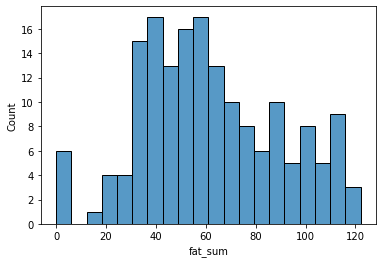

In [16]:
# fat intake distribution worldwide
fig1 = sns.histplot(x='fat_sum', data=df_macro, stat='count', bins=20)

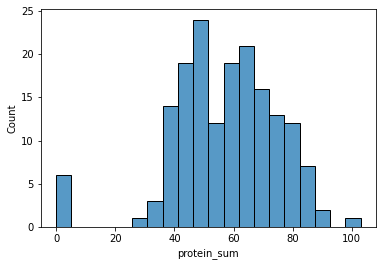

In [17]:
# protein intake distribution worldwide
fig2 = sns.histplot(x='protein_sum', data=df_macro, stat='count', bins=20)

In [18]:
# TODO: check if the histrograms look correct. right now 
# TODO: create carbs intake distribution worldwide

## Histogram of Worldwide Covid Distribution ##
* `x` : percentage of each case
* `y` : count of countries that fall under each bin

In [19]:
print('Total number of countries in the dataset: ', len(df_covid['country']))

Total number of countries in the dataset:  170


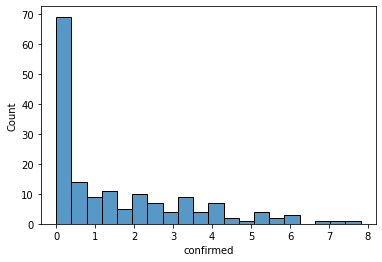

In [20]:
# covid confirmed cases distribution worldwide
fig3 = sns.histplot(x='confirmed', data=df_covid, stat='count', bins=20)

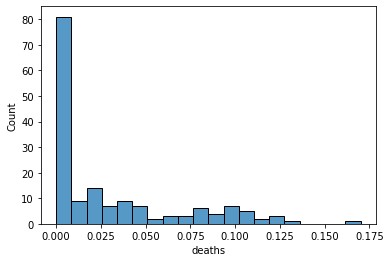

In [21]:
# covid deaths cases distribution worldwide
fig4 = sns.histplot(x='deaths', data=df_covid, stat='count', bins=20)

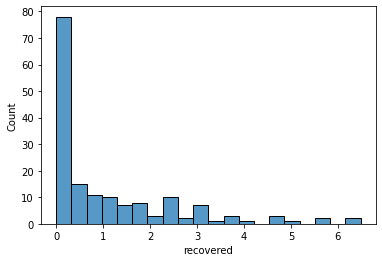

In [22]:
# covid recovered cases distribution worldwide
fig3 = sns.histplot(x='recovered', data=df_covid, stat='count', bins=20)

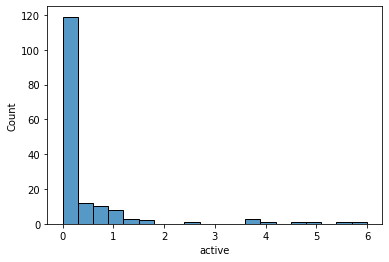

In [23]:
# covid active cases distribution worldwide
fig3 = sns.histplot(x='active', data=df_covid, stat='count', bins=20)

In [24]:
# TODO: regression + other analysis?

## Is there a correlation between macronutrient consumption and COVID cases in a country? ##

In [27]:
# combine macronutrient dataframe with COVID dataframe
macro_covid_combined_df = pd.concat([df_macro, df_covid], axis=1)
macro_covid_combined_df.head()

,country,fat_sum,protein_sum,country,confirmed,deaths,recovered,active,population
0,Afghanistan,22.34895,39.48570,Afghanistan,0.132362,0.005628,0.107190,0.000000,38928000.0
1,Albania,85.87720,87.26785,Albania,2.054827,0.041614,1.185130,0.828083,2838000.0
2,Algeria,58.17735,67.82430,Algeria,0.225211,0.006227,0.151938,0.067047,44357000.0
3,Angola,35.58385,39.49300,Angola,0.054019,0.001245,0.034272,0.018501,32522000.0
4,Antigua and Barbuda,65.04665,59.45120,Antigua and Barbuda,0.162245,0.005102,0.151020,0.006122,98000.0


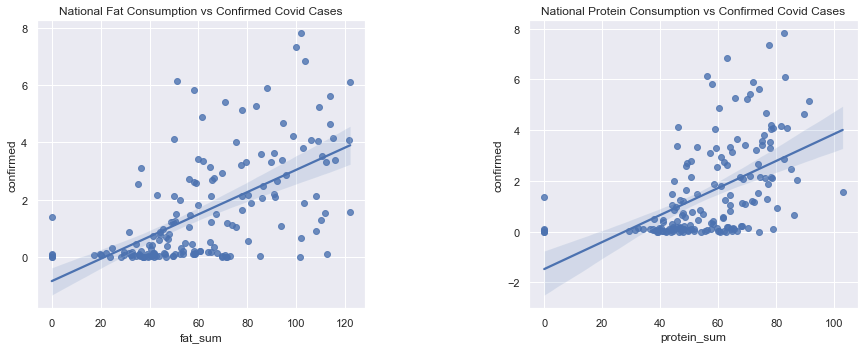

In [45]:
# generate scatterplots with a regression line to visualize relationship 
# between macronutrient consumption and confirmed COVID cases
sns.set()
fig, axes = plt.subplots(1,2)
sns.regplot(data = macro_covid_combined_df, x = 'fat_sum', y = 'confirmed', ax = axes[0])
axes[0].set_title('National Fat Consumption vs Confirmed Covid Cases')
sns.regplot(data = macro_covid_combined_df, x = 'protein_sum', y = 'confirmed', ax = axes[1])
axes[1].set_title('National Protein Consumption vs Confirmed Covid Cases')

# set spacing between the subplots
plt.subplots_adjust(left = 0.1, bottom = -0.1, right = 2.0, top=0.9, wspace = 0.5)

In [46]:
# Linear regression on fat consumption and covid cases
outcome_fat, predictors_fat = patsy.dmatrices('confirmed ~ fat_sum', macro_covid_combined_df)
mod_fat = sm.OLS(outcome_fat, predictors_fat)
res_fat = mod_fat.fit()
print(res_fat.summary())

                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     89.17
Date:                Thu, 19 May 2022   Prob (F-statistic):           3.89e-17
Time:                        23:13:32   Log-Likelihood:                -296.94
No. Observations:                 164   AIC:                             597.9
Df Residuals:                     162   BIC:                             604.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8411      0.281     -2.996      0.0

In [47]:
# Linear regression on protein consumption and covid cases
outcome_protein, predictors_protein = patsy.dmatrices('confirmed ~ protein_sum', macro_covid_combined_df)
mod_protein = sm.OLS(outcome_protein, predictors_protein)
res_protein = mod_protein.fit()
print(res_protein.summary())

                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     56.60
Date:                Thu, 19 May 2022   Prob (F-statistic):           3.49e-12
Time:                        23:15:56   Log-Likelihood:                -308.33
No. Observations:                 164   AIC:                             620.7
Df Residuals:                     162   BIC:                             626.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.4717      0.423     -3.476      

__Interpretation__

In both the scatterplots, we can observe a linear relationship between the two variables using the regression line. 

Additionally, the results of the linear regression analysis suggest that there are statistically signficant relationships between fat consumption and COVID cases and protein consumption and COVID cases. We can see that the 95% confidence interval for both coefficients do not include 0. 